In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st

In [6]:
mouse_path = os.path.join("data", "Mouse_metadata.csv")
results_path = os.path.join("data", "Study_results.csv")

mouse_df = pd.read_csv(mouse_path, low_memory=False)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
results_df = pd.read_csv(results_path, low_memory=False)
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [31]:
combined_df = results_df.merge(mouse_df, on=["Mouse ID"])
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [39]:
combined_df.describe()

#The timepoint column says we have 1893 documented samples across all mice and timepoints.  The rest is junk.
#The rest are the overall numbers, but we need them to be seperated by testing method.

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [33]:
combined_df.sem()
#Again overall stats.  Time to seperate.

Timepoint             0.323602
Tumor Volume (mm3)    0.204436
Metastatic Sites      0.026155
Age_months            0.165245
Weight (g)            0.090134
dtype: float64

In [46]:
sstable_df = combined_df.copy()
sstable_df2 = sstable_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe()
sstable_df2

#Now we're showing the summary statistics of Tumor Volume sorted by Drug Regimen!

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [47]:
sstable_df3 = sstable_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
sstable_df3

#And here's the standard error of the mean of each Tumor Volume sorted by Drug Regimen.

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [48]:
#dataframe plot by Pandas

In [49]:
#dataframe plot by Matplotlib

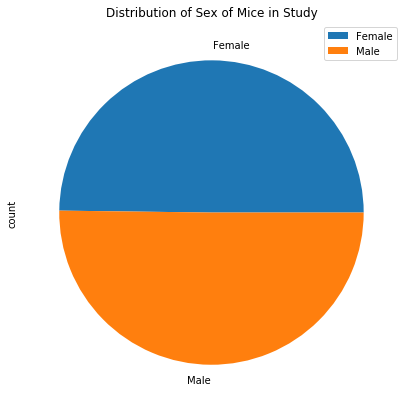

In [90]:
#Pandas pie chart by sex

#Get a table of how many male and female mice are in the study.
pie_df = mouse_df.copy()
pie_df = pie_df.groupby(['Sex'], as_index=True).agg({'Mouse ID':'count'})
pie_df = pie_df.rename(columns={'Mouse ID': 'count'})

#Make a pie out of it.

pie_df
plot = pie_df.plot.pie(y='count', title="Distribution of Sex of Mice in Study", figsize=(7, 7))

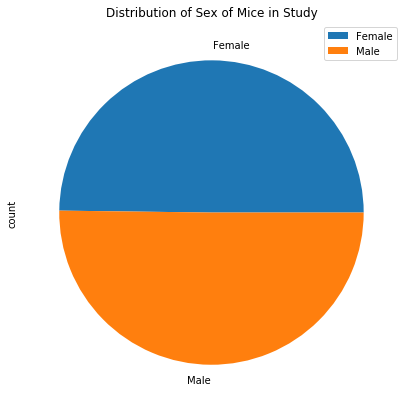

In [92]:
#Matplotlib pie chart by sex

pie_df['count'].plot(kind='pie', title="Distribution of Sex of Mice in Study", figsize=(7,7), legend=True)